In [121]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the random module.
import random 
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [72]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [77]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [74]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [75]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [62]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [63]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=98a9565de397c8ae438f370563562b94


In [64]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [83]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | walvis bay
Processing Record 6 of Set 1 | coahuayana
Processing Record 7 of Set 1 | elbrus
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | eyrarbakki
Processing Record 12 of Set 1 | san ramon
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | kananga
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | healdsburg
Processing Record 18 of Set 1 | liwale
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23

Processing Record 39 of Set 4 | kiunga
Processing Record 40 of Set 4 | sompeta
Processing Record 41 of Set 4 | vangaindrano
Processing Record 42 of Set 4 | dubbo
Processing Record 43 of Set 4 | pozo colorado
Processing Record 44 of Set 4 | kurayoshi
Processing Record 45 of Set 4 | mo i rana
Processing Record 46 of Set 4 | san andres
Processing Record 47 of Set 4 | celestun
Processing Record 48 of Set 4 | beloha
Processing Record 49 of Set 4 | caravelas
Processing Record 50 of Set 4 | hithadhoo
Processing Record 1 of Set 5 | manaus
Processing Record 2 of Set 5 | shenzhen
Processing Record 3 of Set 5 | sahibganj
Processing Record 4 of Set 5 | buchanan
Processing Record 5 of Set 5 | joshimath
Processing Record 6 of Set 5 | puerto madryn
Processing Record 7 of Set 5 | inyonga
Processing Record 8 of Set 5 | saskylakh
Processing Record 9 of Set 5 | plettenberg bay
Processing Record 10 of Set 5 | riyadh
Processing Record 11 of Set 5 | gunjur
Processing Record 12 of Set 5 | ostrovnoy
Processin

Processing Record 31 of Set 8 | batemans bay
Processing Record 32 of Set 8 | pangai
Processing Record 33 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 34 of Set 8 | sur
Processing Record 35 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 36 of Set 8 | kattivakkam
Processing Record 37 of Set 8 | kenai
Processing Record 38 of Set 8 | rogovatoye
Processing Record 39 of Set 8 | sadiqabad
Processing Record 40 of Set 8 | port hardy
Processing Record 41 of Set 8 | jiayuguan
Processing Record 42 of Set 8 | amderma
City not found. Skipping...
Processing Record 43 of Set 8 | aksu
Processing Record 44 of Set 8 | cidreira
Processing Record 45 of Set 8 | tiarei
Processing Record 46 of Set 8 | carutapera
Processing Record 47 of Set 8 | asosa
Processing Record 48 of Set 8 | sept-iles
Processing Record 49 of Set 8 | padang
Processing Record 50 of Set 8 | aklavik
Processing Record 1 of Set 9 | zhangye
Processing Record 2 of Set 9 | camacha
Processing Record 3 o

Processing Record 18 of Set 12 | maravilha
Processing Record 19 of Set 12 | matheran
Processing Record 20 of Set 12 | trelew
Processing Record 21 of Set 12 | guadalajara
Processing Record 22 of Set 12 | auki
Processing Record 23 of Set 12 | grand forks
Processing Record 24 of Set 12 | bandiagara
Processing Record 25 of Set 12 | sinnamary
Processing Record 26 of Set 12 | oskemen
Processing Record 27 of Set 12 | lubbock
Processing Record 28 of Set 12 | puteyets
Processing Record 29 of Set 12 | bathsheba
Processing Record 30 of Set 12 | otane
Processing Record 31 of Set 12 | jinxiang
Processing Record 32 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 33 of Set 12 | bad salzungen
Processing Record 34 of Set 12 | saint-georges
Processing Record 35 of Set 12 | tual
Processing Record 36 of Set 12 | hailey
Processing Record 37 of Set 12 | grand gaube
Processing Record 38 of Set 12 | pauini
Processing Record 39 of Set 12 | kargasok
Processing Record 40 of Set 12 | ribeira 

In [87]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,42.80,78,20,23.04,CL,2020-04-19 23:23:16
1,Jamestown,42.10,-79.24,46.00,81,90,12.75,US,2020-04-19 23:22:18
2,Rikitea,-23.12,-134.97,77.07,67,100,5.99,PF,2020-04-19 23:22:54
3,Atuona,-9.80,-139.03,82.89,73,38,12.97,PF,2020-04-19 23:23:01
4,Walvis Bay,-22.96,14.51,60.80,82,15,1.12,NA,2020-04-19 23:26:02
...,...,...,...,...,...,...,...,...,...
550,Laguna,38.42,-121.42,71.01,48,1,6.93,US,2020-04-19 23:28:23
551,Hualmay,-11.10,-77.61,70.61,78,21,8.08,PE,2020-04-19 23:28:23
552,Oktyabrskiy,54.48,53.47,37.74,73,88,1.63,RU,2020-04-19 23:28:23
553,Bogotol,56.21,89.53,35.78,68,34,10.07,RU,2020-04-19 23:28:24


In [88]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-04-19 23:23:16,-53.15,-70.92,42.80,78,20,23.04
1,Jamestown,US,2020-04-19 23:22:18,42.10,-79.24,46.00,81,90,12.75
2,Rikitea,PF,2020-04-19 23:22:54,-23.12,-134.97,77.07,67,100,5.99
3,Atuona,PF,2020-04-19 23:23:01,-9.80,-139.03,82.89,73,38,12.97
4,Walvis Bay,NA,2020-04-19 23:26:02,-22.96,14.51,60.80,82,15,1.12
5,Coahuayana,MX,2020-04-19 23:26:02,18.73,-103.68,84.20,54,5,5.82
6,Elbrus,RU,2020-04-19 23:26:02,43.26,42.64,33.49,38,41,4.65
7,Kavieng,PG,2020-04-19 23:26:03,-2.57,150.80,83.79,75,78,7.14
8,Port Alfred,ZA,2020-04-19 23:23:37,-33.59,26.89,72.00,74,14,7.36
9,Tuktoyaktuk,CA,2020-04-19 23:26:03,69.45,-133.04,10.40,85,90,9.17


In [89]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [91]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

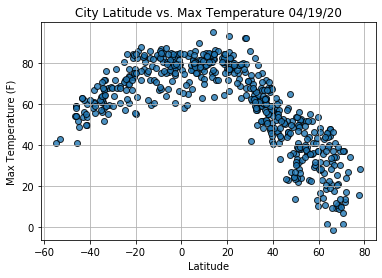

In [96]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

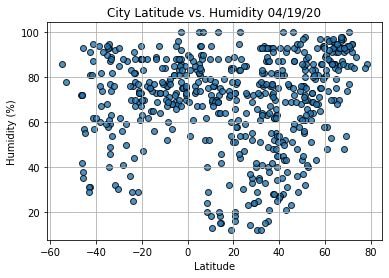

In [97]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

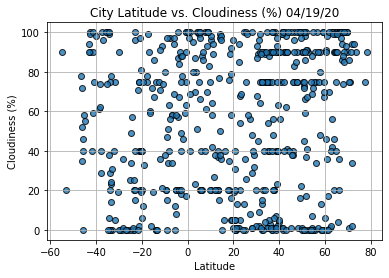

In [98]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

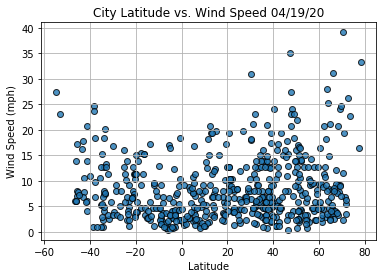

In [99]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [133]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [104]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jamestown,US,2020-04-19 23:22:18,42.10,-79.24,46.00,81,90,12.75
5,Coahuayana,MX,2020-04-19 23:26:02,18.73,-103.68,84.20,54,5,5.82
6,Elbrus,RU,2020-04-19 23:26:02,43.26,42.64,33.49,38,41,4.65
9,Tuktoyaktuk,CA,2020-04-19 23:26:03,69.45,-133.04,10.40,85,90,9.17
10,Eyrarbakki,IS,2020-04-19 23:26:03,63.86,-21.15,46.40,93,90,25.28
...,...,...,...,...,...,...,...,...,...
549,Awjilah,LY,2020-04-19 23:28:23,29.11,21.29,71.08,24,32,8.59
550,Laguna,US,2020-04-19 23:28:23,38.42,-121.42,71.01,48,1,6.93
552,Oktyabrskiy,RU,2020-04-19 23:28:23,54.48,53.47,37.74,73,88,1.63
553,Bogotol,RU,2020-04-19 23:28:24,56.21,89.53,35.78,68,34,10.07


In [126]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

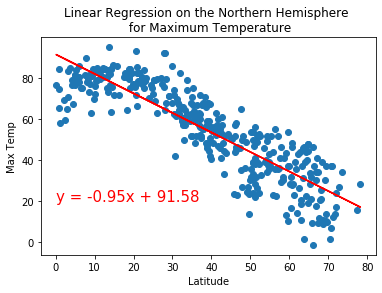

In [137]:
  # Linear regression on the Northern Hemisphere
  x_values = northern_hemi_df["Lat"]
  y_values = northern_hemi_df["Max Temp"]
  # Call the function.
  plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,20))
                      

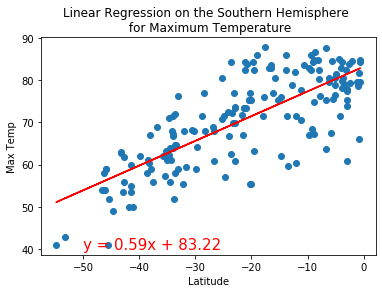

In [139]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,40))

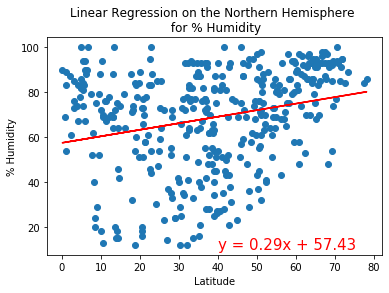

In [141]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

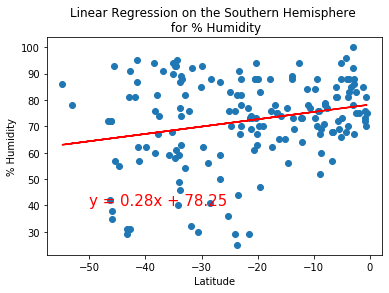

In [145]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,40))

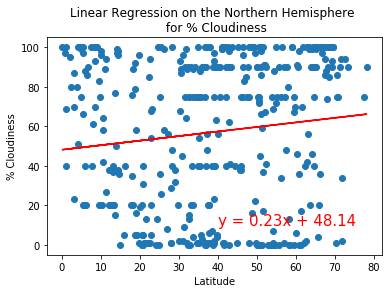

In [147]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

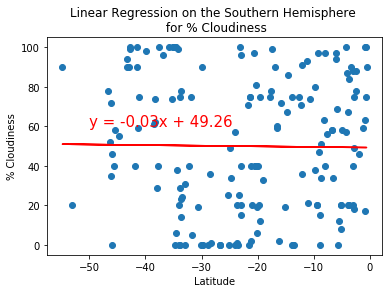

In [150]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

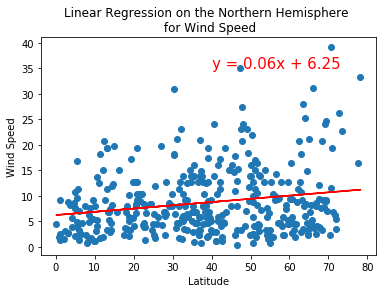

In [155]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

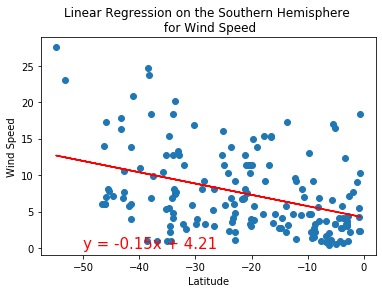

In [157]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,0))